In [2]:
import pandas as pd

In [128]:
code = pd.read_csv('issues.csv')#, index_col='year', parse_dates=True)
#we take a look on head
code.head()

,name,year,quarter,count
0,Ruby,2011,3,965
1,JavaScript,2011,3,694
2,Python,2011,3,619
3,PHP,2011,3,560
4,Java,2011,3,420


In [84]:
#We get some stats from DataFrame
code.describe()

,year,quarter,count
count,3375.000000,3375.000000,3375.000000
mean,2016.833481,2.510222,9210.374815
std,2.574464,1.119345,28680.099075
min,2011.000000,1.000000,100.000000
25%,2015.000000,2.000000,222.500000
50%,2017.000000,3.000000,567.000000
75%,2019.000000,4.000000,2989.500000
max,2022.000000,4.000000,341480.000000


In [7]:
#We get the DataFrame dimension for some comparaison
code.shape

(3375, 4)

In [67]:
#We gonna get most issues Programming Language
#First we gonna create a new DataFrame

df = pd.DataFrame(code.groupby(['name', 'year'])['count'].sum().nlargest(10))
df.reset_index(level=0, inplace=True)
df

,name,count
year,,
2016,JavaScript,1256011
2017,JavaScript,1232611
2015,JavaScript,1036613
2018,JavaScript,733108
2017,Python,723965
2017,Java,682631
2016,Python,626769
2016,Java,601289
2014,JavaScript,596429


In [21]:
df1 = pd.DataFrame(code.groupby('name')['count'].sum().nlargest(10))
df1.reset_index(level=0, inplace=True)
df1

,name,count
0,JavaScript,6500226
1,Python,4192481
2,Java,3536070
3,PHP,2240585
4,C++,1941004
5,TypeScript,1741593
6,Go,1645358
7,C#,1407859
8,Ruby,1292627
9,C,1003056


In [145]:
# df2 = pd.DataFrame(code.groupby(['name', 'year'])['count'].sum().nlargest(10))
# df2.loc['2016', 'year'].mean()
# df2.reset_index(level=0, inplace=True)
# df2


#we sort data per year

code1 = pd.read_csv('issues.csv', index_col='year', parse_dates=True)

df2 = pd.DataFrame(code1.loc['2011'].groupby('name')['count'].sum().nlargest(10))
df2.reset_index(level=0, inplace=True)
df2

,name,count
0,Ruby,5326
1,JavaScript,4697
2,Python,3764
3,PHP,3401
4,C++,2280
5,Java,2228
6,C,1276
7,C#,888
8,Objective-C,496
9,Shell,306


In [57]:
#we count the number of programming langage in DataFrame
len(code['name'].unique())

178

In [58]:
#We get all programming langages in DataFRame
code['name'].unique()

array(['Ruby', 'JavaScript', 'Python', 'PHP', 'Java', 'C++', 'C', 'C#',
       'Objective-C', 'Shell', 'Scala', 'HTML', 'Haskell', 'Factor',
       'CSS', 'Clojure', 'Erlang', 'Rust', 'ActionScript', 'CoffeeScript',
       'Emacs Lisp', 'TypeScript', 'XSLT', 'Go', 'Perl', 'Groovy',
       'ColdFusion', 'Lua', 'Elixir', 'Smalltalk', 'Objective-J',
       'Vim script', 'LiveScript', 'D', 'Common Lisp', 'Haxe', 'Kotlin',
       'Brightscript', 'AGS Script', 'AutoHotkey', 'Jupyter Notebook',
       'DCPU-16 ASM', 'VimL', 'Visual Basic', 'F#', 'Roff', 'Matlab',
       'Racket', 'SQF', 'Julia', 'Standard ML', 'Vala', 'Cuda', 'OCaml',
       'TeX', 'Dart', 'PowerShell', 'DM', 'Pascal', 'Puppet',
       'PostScript', 'Swift', 'Makefile', 'Eiffel', 'R', 'Assembly',
       'API Blueprint', 'Scheme', 'Ceylon', 'Fortran', 'Nix', 'SCSS',
       'QML', 'Max', 'Tcl', 'Apex', 'Ragel in Ruby Host', 'TSQL',
       'PLpgSQL', 'CMake', 'ApacheConf', 'Processing', 'Mako', 'Eagle',
       'ASP', 'MATLAB', '

In [90]:
#we get issue volume per year

volume = pd.DataFrame(code.groupby('year')['count'].sum())
volume.reset_index(level=0, inplace=True)
volume

,year,count
0,2011,26074
1,2012,483126
2,2013,1243638
3,2014,2385009
4,2015,4039150
5,2016,5200985
6,2017,5655575
7,2018,3828083
8,2019,3171733
9,2020,2996125


Text(0.5, 0, 'Language Name')

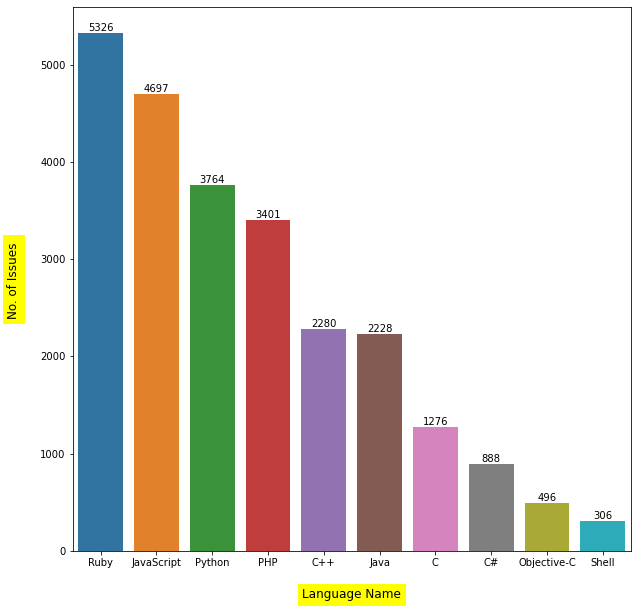

In [146]:
#we gonna fetch a bar graphic

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'name', y = 'count',data = df2)
ax.bar_label(ax.containers[0])
ax.set_ylabel('No. of Issues ', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Language Name', size = 'large',backgroundcolor = 'yellow',labelpad = 20)